In [1]:
import tensorflow as tf
import scipy.io as sio 
import numpy as np
import pandas as pd
#import tensorflow as tf
#from keras import Model
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Input, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model

from tensorflow.python.client import device_lib

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)
    
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU' or x.device_type == 'CPU']



i=sio.loadmat('inputFeatures.mat')
print(sorted(i.keys()))

TTest=i['TTest']
#print(TTest)

print("TTest:",TTest.shape)
#print(TTest)
#print(type(TTest))

TTrain=i['TTrain']
print("TTrain:",TTrain.shape)
# print(TTrain)

XTrain=i['XTrain']
print("XTrain:",XTrain.shape)
#print(XTrain)
#print(type(XTrain))

XTest=i['XTest']
print("XTest:",XTest.shape)
# print(XTest)
# print(type(XTest))

XTrain=XTrain.reshape(-1)
TTrain=TTrain.reshape(-1)
XTest=XTest.reshape(-1)
TTest=TTest.reshape(-1)

#print(XTrain)

#column_series = pd.DataFrame(np.array(XTrain))
#print(column_series[0])


data=np.transpose(np.array(XTrain[0]))
data1=np.transpose(np.array(XTrain[1]))
test=np.stack((data,data1),axis=0)
data2=np.transpose(np.array(XTrain[2]))
# a=[]
# a.append(data)
# a.append(data1)
# a.append(data2)
# #print(a)
# a=np.stack(a)
#print(a)
#print(a.shape)


##________________________________________TEST
test=np.transpose(XTrain).reshape(-1)
#print(test)
list_test=[]
for i in range(len(test)):
    test[i]=np.transpose(np.array(test[i]))
    list_test.append(test[i])

list_test=np.vstack(list_test)
df=pd.DataFrame(list_test)
df.columns = ['C1','C2','C3','C4']
print(df)
normalized_df=(df-df.mean())/df.std()
#print(normalized_df.shape)
#________________________________________
print(normalized_df)
normalized_df=normalized_df.to_numpy()

# FOR 2D INPUT - RESHAPE TO 3D AS BELOW
#normalized_df=normalized_df.reshape(67950,1,4)
#print(normalized_df)
#TTrain=np.repeat(TTrain,50)

listTest=[]
i=0
while i < (len(normalized_df)):
    listTest.append(normalized_df[i:i+50])
    i=i+50

#print(listTest)
listTest=np.stack(listTest)


testArr=[]
for i in range(len(XTest)):
    testArr.append(np.transpose(np.array(XTest[i])))

testArr=np.stack(testArr)


length = 50
n_features = 4
model = Sequential()
model.add(LSTM(150,input_shape=(length,n_features)))
#model.add(tf.keras.layers.RNN(tf.keras.layers.LSTMCell(150)),input_shape=(length,n_features))
#model.add(Dense(16, activation= 'elu', kernel_initializer='normal'))

#model.add(Dense(1, activation='linear'))
model.add(Dense(1))

#opt=Adam(learning_rate=0.02)
#model.compile(optimizer=opt, loss='mean_squared_logarithmic_error')

model.compile(optimizer='adam', loss='mean_squared_logarithmic_error',metrics=['accuracy'])
model.summary()
  
with tf.device('/gpu:0'):
    model.fit(listTest,TTrain,epochs=100,verbose=2,validation_data=(testArr,TTest))


with tf.device('/cpu:0'):
    Y_hat=model.predict(testArr)

#print(Y_hat)
TTest=TTest.reshape(len(TTest),1)
#print(np.array(TTest))

dataResult=np.concatenate((Y_hat,TTest),axis=1)
#print(dataResult)

['TTest', 'TTrain', 'XTest', 'XTrain', '__globals__', '__header__', '__version__']
TTest: (340, 1)
TTrain: (1359, 1)
XTrain: (1359, 1)
XTest: (340, 1)
             C1        C2      C3        C4
0      2.594557  0.459191  0.3900  0.068406
1      2.570753  0.496237  0.4050  0.080021
2      2.553465  0.533884  0.3825  0.069378
3      2.585183  0.476851  0.3975  0.079567
4      2.589196  0.526986  0.3825  0.065496
...         ...       ...     ...       ...
67945  3.516776  0.437440  0.3975  0.080801
67946  3.383230  0.659559  0.3825  0.072998
67947  3.425420  0.499233  0.3975  0.083357
67948  3.330528  0.516398  0.3725  0.075701
67949  3.444686  0.457105  0.3950  0.079806

[67950 rows x 4 columns]
             C1        C2        C3        C4
0      0.323124  0.251716 -0.079844 -0.000175
1      0.298567  0.479955 -0.075502  0.026230
2      0.280732  0.711891 -0.082015  0.002033
3      0.313454  0.360520 -0.077673  0.025197
4      0.317594  0.669393 -0.082015 -0.006793
...         ...    

Epoch 48/100
43/43 - 0s - loss: 0.0969 - accuracy: 0.0000e+00 - val_loss: 0.2258 - val_accuracy: 0.0000e+00 - 458ms/epoch - 11ms/step
Epoch 49/100
43/43 - 0s - loss: 0.0969 - accuracy: 0.0000e+00 - val_loss: 0.2224 - val_accuracy: 0.0000e+00 - 451ms/epoch - 10ms/step
Epoch 50/100
43/43 - 0s - loss: 0.0955 - accuracy: 0.0000e+00 - val_loss: 0.2291 - val_accuracy: 0.0000e+00 - 474ms/epoch - 11ms/step
Epoch 51/100
43/43 - 0s - loss: 0.0949 - accuracy: 0.0000e+00 - val_loss: 0.2276 - val_accuracy: 0.0000e+00 - 477ms/epoch - 11ms/step
Epoch 52/100
43/43 - 0s - loss: 0.0945 - accuracy: 0.0000e+00 - val_loss: 0.2259 - val_accuracy: 0.0000e+00 - 464ms/epoch - 11ms/step
Epoch 53/100
43/43 - 0s - loss: 0.0955 - accuracy: 0.0000e+00 - val_loss: 0.2266 - val_accuracy: 0.0000e+00 - 479ms/epoch - 11ms/step
Epoch 54/100
43/43 - 0s - loss: 0.0939 - accuracy: 0.0000e+00 - val_loss: 0.2197 - val_accuracy: 0.0000e+00 - 471ms/epoch - 11ms/step
Epoch 55/100
43/43 - 0s - loss: 0.0937 - accuracy: 0.0000e+00 

In [2]:
print("Evaluate on test data")
results = model.evaluate(testArr,TTest) 
print("test loss", results)
print('Test score:', results[0])
print('Test accuracy:', results[1])

get_available_devices() 

Evaluate on test data
11/11 [==============================] - 1s 6ms/step - loss: 0.2923 - accuracy: 0.0000e+00
test loss [0.29228153824806213, 0.0]
Test score: 0.29228153824806213
Test accuracy: 0.0


['/device:CPU:0', '/device:GPU:0']

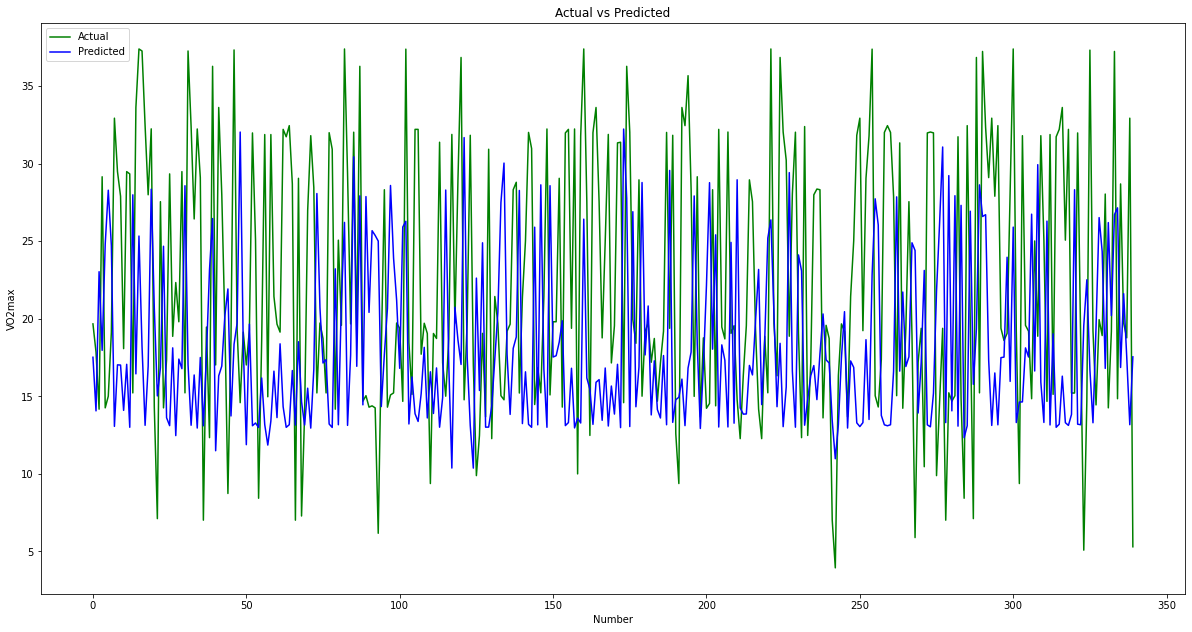

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.plot(TTest,color='green',label='Actual')
plt.plot(Y_hat,color='blue',label='Predicted')
plt.xlabel('Number')
plt.ylabel('VO2max')
plt.title('Actual vs Predicted')
plt.legend()
#plt.figure(figsize=(100,100))

#plt.show()
fig = plt.gcf()
fig.set_size_inches(20.5, 10.5)
fig.savefig('test2png.png', dpi=150)

In [4]:
#pd.DataFrame(dataResult).to_csv('sample.csv')